In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from scipy.stats import t
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import norm
import seaborn as sns

In [2]:
os.chdir('C:/Users/l1989/Desktop/DA/Weekly Projects')

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'Barcelona 2017',
 'googleplaystore.csv',
 'PAP1',
 'Presentation week 3.pptx',
 'Week 1 Project_Strong Random PW Generator.ipynb',
 'Week 3 Project Web Scrapping.ipynb',
 'Week 4 Barcelona EDA.ipynb',
 'Week 4-Barcelona Dataset EDA.pptx',
 'Week 5-6 Google Player Store.ipynb']

In [4]:
df=pd.read_csv('googleplaystore.csv')

In [5]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df[df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [7]:
df.Type.value_counts()
df['Type']=df.Type.replace(['0'],'Free')
df.Type.value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

In [8]:
df.Category.value_counts()
df=df[df.Category != '1.9']
df.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [9]:
df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 6.0                1
7.0 - 7.1.1              1
2.2 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [10]:
df[['Android version','col1','col2']] = df['Android Ver'].str.split(" ",expand=True)

In [11]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android version,col1,col2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4.0.3,and,up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,4.0.3,and,up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.0.3,and,up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4.2,and,up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.4,and,up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,4.1,and,up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,4.1,and,up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,2.2,and,up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Varies,with,device


In [12]:
df=df.drop(columns=['Android Ver','col1','col2'])

In [13]:
df['Android version']=df['Android version'].replace(['4.4W'],'4.4')

In [14]:
df['Android version'].value_counts()

4.1       2452
4.0.3     1503
4.0       1375
Varies    1362
4.4        992
2.3        652
5.0        605
4.2        394
2.3.3      281
2.2        245
4.3        243
3.0        241
2.1        134
1.6        116
6.0         60
7.0         43
3.2         36
2.0         32
5.1         24
1.5         20
3.1         10
2.0.1        7
8.0          6
7.1          3
1.0          2
Name: Android version, dtype: int64

In [23]:
"""
App with the largest number of installs, and I removed +
"""
df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [25]:
df['Installs'] = df['Installs'].astype(int)

In [15]:
df.isin(['Varies with device']).any()

App                False
Category           False
Rating             False
Reviews            False
Size                True
Installs           False
Type               False
Price              False
Content Rating     False
Genres             False
Last Updated       False
Current Ver         True
Android version    False
dtype: bool

In [16]:
df=df[(df.Size != 'Varies with device') & (df['Current Ver'] != 'Varies with device' )]

In [17]:
df.isin(['Varies with device']).any()

App                False
Category           False
Rating             False
Reviews            False
Size               False
Installs           False
Type               False
Price              False
Content Rating     False
Genres             False
Last Updated       False
Current Ver        False
Android version    False
dtype: bool

In [55]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('+',''))

In [100]:
df['Price']=df.Price.str.lstrip('$').astype(float)

dtype('float64')

# So, I cleaned the data and dropped around 1000 rows which contained 'Varies with device' in Size and Current Ver. I am not sure if it is necessary for our research. Please check.

In [94]:
mode=df.Price.mode()[0]

In [95]:
mode 

'0'

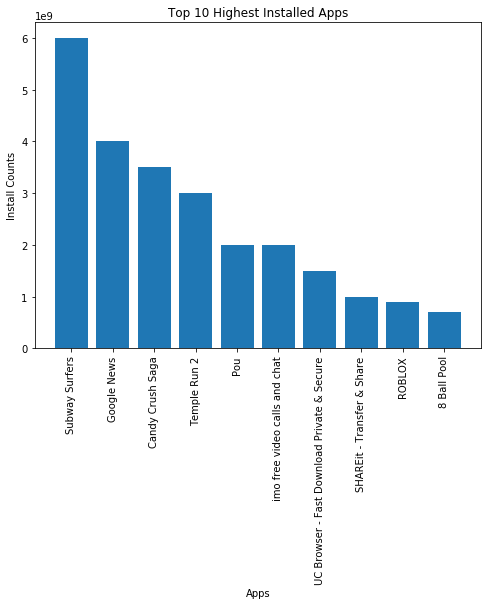

In [53]:
App_installed = df.groupby('App')['Installs'].sum().reset_index()
final_result = App_installed.sort_values(by = 'Installs', ascending = False).head(10)

plt.figure(figsize=(8,6))
plt.bar('App','Installs', data=final_result)
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Install Counts")
plt.title("Top 10 Highest Installed Apps")
plt.show()

In [80]:
import matplotlib.colors
import plotly.express as px

C:\Users\l1989\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


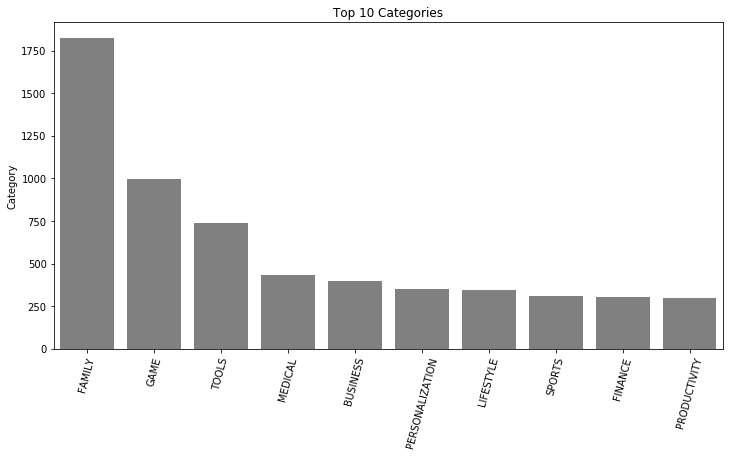

In [78]:
top_categories = df.Category.value_counts().head(10)

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 Categories')
sns.barplot(top_categories.index, top_categories,color='grey')

# I was trying to color the top 3 in different color but I couldn't manage

In [87]:
fig = px.histogram(top_categories, df.Rating, marginal='box')
fig.update_layout(title_text='Distribution of Ratings Across All Apps in The Top 10 Categories', title_font_size=16)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [57]:
def compute_app_types(df):
    """
    Given a dataframe, compute the number 
    of free and paid apps respectively
    """
    return sum(df.Type == "Free"), sum(df.Type == 'Paid')

def plot_app_types(df):
    """
    Plot app type distributions across categories
    """
    vc_rating = df.Category.value_counts()
    cat_free_apps = []
    cat_paid_apps = []
    for cat in vc_rating.index:
        n_free, n_paid = compute_app_types(df.query("Category == '{}'".format(cat)))
        cat_free_apps.append(n_free)
        cat_paid_apps.append(n_paid)

    f, ax = plt.subplots(2,1)
    ax[0].bar(range(1, len(cat_free_apps)+1), cat_free_apps)
    ax[1].bar(range(1, len(cat_free_apps)+1), cat_paid_apps)

def plot_target_by_group(df, target_col, group_col, figsize=(6,4), title=""):
    """
    Plot the mean of a target column (Numeric) groupped by the group column (categorical)
    """
    order = sorted(list(set(df[group_col])))
    stats = df.groupby(group_col).mean()[target_col]
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=group_col, y=target_col, data=df, ax=ax, order=order).set_title(title)
    ax.set(ylim=(3.8, 4.5))  
    ax.tick_params(labelrotation=90)
    return stats

[Text(0, 0, 'ART_AND_DESIGN'),
 Text(0, 0, 'AUTO_AND_VEHICLES'),
 Text(0, 0, 'BOOKS_AND_REFERENCE'),
 Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'DATING'),
 Text(0, 0, 'EDUCATION'),
 Text(0, 0, 'ENTERTAINMENT'),
 Text(0, 0, 'EVENTS'),
 Text(0, 0, 'FAMILY'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'FOOD_AND_DRINK'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'LIBRARIES_AND_DEMO'),
 Text(0, 0, 'LIFESTYLE'),
 Text(0, 0, 'MAPS_AND_NAVIGATION'),
 Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'NEWS_AND_MAGAZINES'),
 Text(0, 0, 'PARENTING'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'SHOPPING'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'VIDEO_PLAYERS'),
 Text(0, 0, 'WEATHER')]

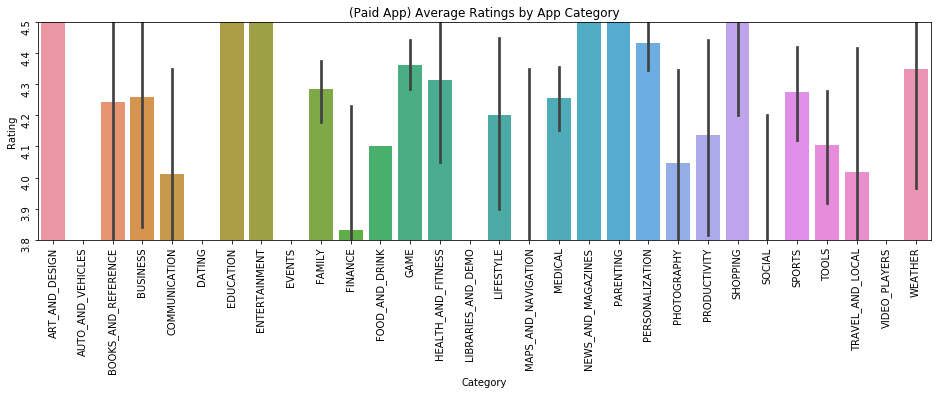

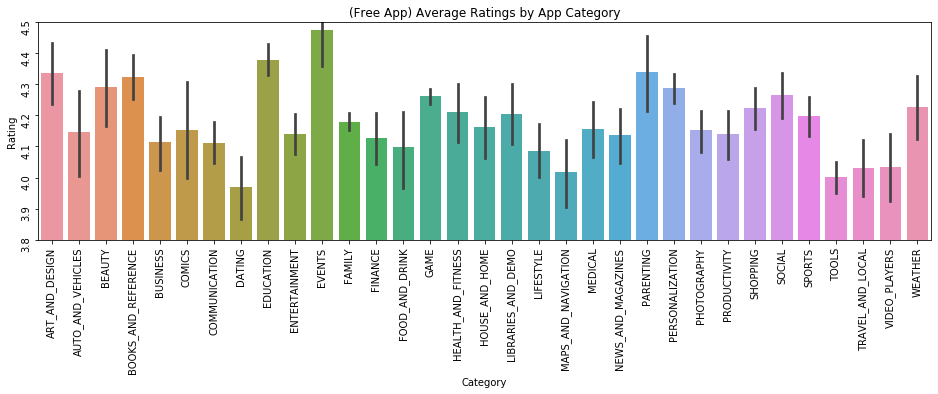

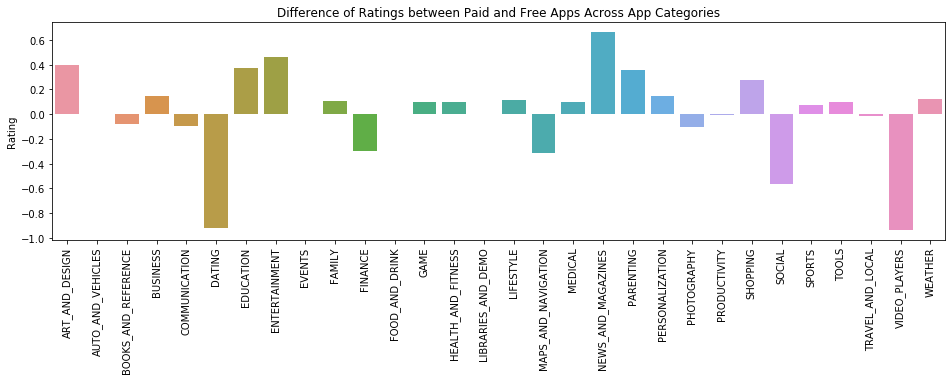

In [59]:
data_filter = df[['Rating', 'Type', 'Category']]
"""
Rating Distribution based on Free and Paid Apps
"""
paid_stats = plot_target_by_group(data_filter.query('Type == "Paid"'), 'Rating', 'Category', (16, 4), "(Paid App) Average Ratings by App Category")
free_stats = plot_target_by_group(data_filter.query('Type == "Free"'), 'Rating', 'Category', (16, 4), "(Free App) Average Ratings by App Category")


fig, ax = plt.subplots(figsize=(16,4))
sorted_idx = sorted(paid_stats.index)
rating_diff = paid_stats[sorted_idx] - free_stats[sorted_idx]
g = sns.barplot(x=sorted_idx, y=rating_diff, ax=ax)
g.set_title("Difference of Ratings between Paid and Free Apps Across App Categories");

g.set_xticklabels(g.get_xticklabels(), rotation=90)

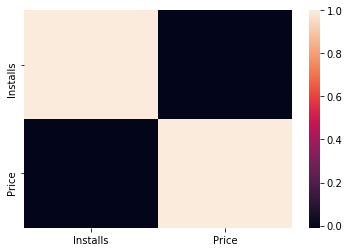

In [106]:
df2=df[['Installs','Price']].copy()
Heatmap1= sns.heatmap(df2.corr())

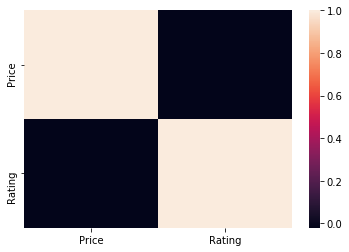

In [109]:
df3=df[['Price','Rating']].copy()
Heatmap2 = sns.heatmap(df3.corr())